# How are our forests distributed across the world regions?
----

>### Recorded Forest Area

>>#### The term **‘Forest Area’ (or recorded forest area)** generally refers to all the geographic areas recorded as forest in government records, thus the term ‘forest area’ denotes the legal status of the land as per the government records.

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

In [2]:
sgf_df = pd.read_csv('share-global-forest.csv')

In [3]:
sgf_df.shape

(7846, 4)

In [4]:
sgf_df.dtypes

Entity                          object
Code                            object
Year                             int64
Share of global forest area    float64
dtype: object

In [5]:
sgf_df.head()

,Entity,Code,Year,Share of global forest area
0,Afghanistan,AFG,1990,0.028525
1,Afghanistan,AFG,1991,0.028578
2,Afghanistan,AFG,1992,0.028631
3,Afghanistan,AFG,1993,0.028684
4,Afghanistan,AFG,1994,0.028738


#

### Continents 

In [6]:
sgf_df['Code'].fillna(' ', inplace = True)

In [7]:
filt1 = (sgf_df['Code'] == ' ')
continent_df = sgf_df[filt1]

In [8]:
filt2 = (continent_df['Year'] == 2020)
continent2020_df = continent_df[filt2]

In [9]:
continent2020_df['Entity'].unique()

array(['Africa', 'Americas', 'Asia', 'Bonaire, Sint Eustatius and Saba',
       'Caribbean', 'Central America', 'Central Asia', 'EU-27', 'EU-28',
       'Eastern Africa', 'Eastern Asia', 'Eastern Europe', 'Europe',
       'Faroe Islands', 'French Guyana',
       'Land Locked Developing Countries', 'Least Developed Countries',
       'Low Income Food Deficit Countries', 'Micronesia', 'Middle Africa',
       'Net Food Importing Developing Countries', 'Northern Africa',
       'Northern America', 'Northern Europe', 'Oceania',
       'Sint Maarten (French part)', 'Small Island Developing States',
       'South America', 'Southeastern Asia', 'Southern Africa',
       'Southern Asia', 'Southern Europe', 'Wallis and Futuna Islands',
       'Western Africa', 'Western Asia', 'Western Europe'], dtype=object)

In [10]:
filt3 = (continent2020_df['Entity'].isin(['Bonaire, Sint Eustatius and Saba','Caribbean','EU-27', 'EU-28','Faroe Islands', 'French Guyana',
                                'Land Locked Developing Countries', 'Least Developed Countries','Low Income Food Deficit Countries', 
                                'Micronesia','Net Food Importing Developing Countries','Sint Maarten (French part)', 'Small Island Developing States', 
                                'Wallis and Futuna Islands']))

In [11]:
ConvertedContinent2020_df = continent2020_df[~filt3]
ConvertedContinent2020_df.set_index('Entity', inplace = True)

In [12]:
continents = ['Asia', 'Northern America', 'South America', 'Europe', 'Oceania', 'Africa']

ConvertedContinent2020_df_1 = ConvertedContinent2020_df[ConvertedContinent2020_df.index.isin(continents)].sort_values(by = 'Share of global forest area', ascending = False)
ConvertedContinent2020_df_1.drop(columns = ['Code', 'Year'], inplace = True)

In [13]:
ConvertedContinent2020_df_1

,Share of global forest area
Entity,
Europe,25.067194
South America,20.798216
Northern America,16.179755
Africa,15.684882
Asia,15.341142
Oceania,4.563958


In [14]:
temp = ['Asia', 'Americas', 'Europe', 'Africa']
ConvertedContinent2020_df_2 = ConvertedContinent2020_df[~ConvertedContinent2020_df.index.isin(temp)].sort_values(by = 'Share of global forest area', ascending = False)
ConvertedContinent2020_df_2.drop(columns = ['Code', 'Year'], inplace = True)

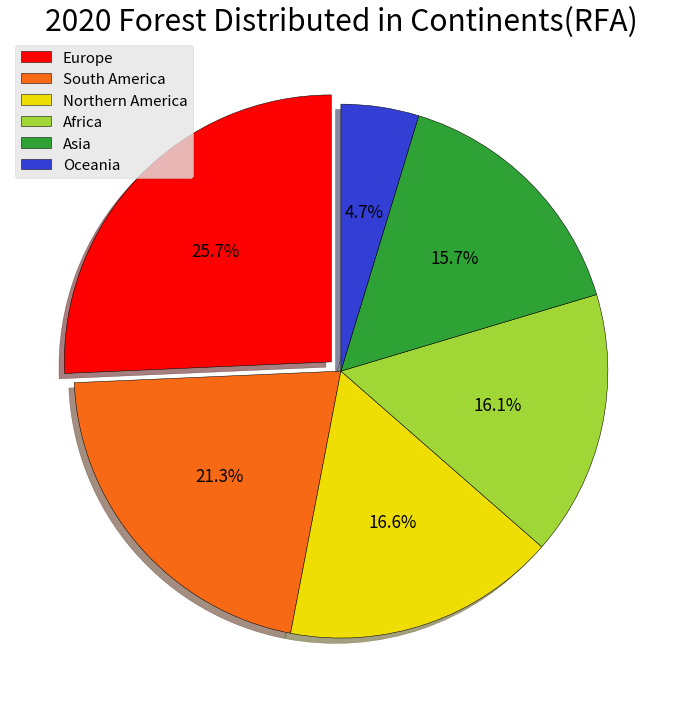

In [15]:
plt.style.use('ggplot')
plt.figure(figsize=(14,10))

slices = ConvertedContinent2020_df_1['Share of global forest area'].round(1)
labels = ConvertedContinent2020_df_1.index
explode = [0.05, 0, 0, 0, 0, 0]
colors = ['#FD0100', '#F76915', '#EEDE04', '#A0D636', '#2FA236', '#333ED4'] 

plt.pie(slices, 
    labels= None,
    explode = explode,
    colors = colors,
    shadow = True,
    wedgeprops= {'edgecolor' : 'Black'}, 
    textprops={'fontsize': 17},
    startangle = 90, 
    autopct= '%1.1f%%')

plt.title('2020 Forest Distributed in Continents(RFA)', fontsize = 30)

plt.legend(labels, loc = 'upper left', fontsize = 15)

plt.tight_layout()
plt.show()

In [16]:
ConvertedContinent2020_df_2

,Share of global forest area
Entity,
Eastern Europe,21.215343
South America,20.798216
Northern America,16.179755
Middle Africa,7.087970
Eastern Asia,6.686560
Southeastern Asia,5.111597
Eastern Africa,4.863538
Oceania,4.563958
Southern Asia,2.476773


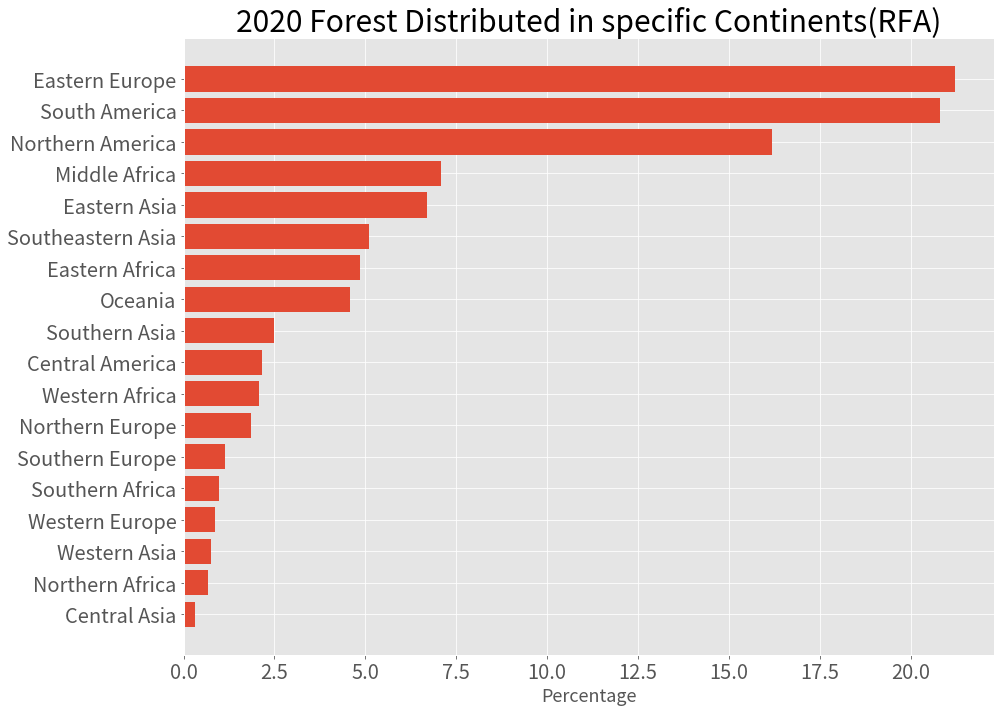

In [27]:
plt.style.use('ggplot')
plt.figure(figsize=(14,10))

continents = []
for x in ConvertedContinent2020_df_2.index:
    continents.append(x)

percentage_cont = []
for x in ConvertedContinent2020_df_2['Share of global forest area']:
    percentage_cont.append(x)

continents.reverse()
percentage_cont.reverse()

plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)

plt.barh(continents, percentage_cont)

plt.title('2020 Forest Distributed in specific Continents(RFA)', fontsize = 30)
plt.xlabel('Percentage', fontsize = 18)

plt.tight_layout()
plt.show()

#

### Countries

In [18]:
countries_df = sgf_df[~filt1]
filt5 = (countries_df['Year'] == 2020)

countries2020_df = countries_df[filt5]

In [19]:
countries2020_df[(countries2020_df['Entity'] == 'World')]


,Entity,Code,Year,Share of global forest area
7752,World,OWID_WRL,2020,100.0


In [20]:
ConvertedCountries2020_df = countries2020_df.drop(index = 7752)

In [21]:
ConvertedCountries2020_df.sort_values(by = 'Share of global forest area', ascending = False, inplace = True)

In [22]:
ConvertedCountries2020_df.head(10)

,Entity,Code,Year,Share of global forest area
5759,Russia,RUS,2020,20.086841
952,Brazil,BRA,2020,12.235223
1200,Canada,CAN,2020,8.547272
7351,United States,USA,2020,7.632423
1477,China,CHN,2020,5.419605
462,Australia,AUS,2020,3.301485
1782,Democratic Republic of Congo,COD,2020,3.108088
3198,Indonesia,IDN,2020,2.269887
5513,Peru,PER,2020,1.782004
3167,India,IND,2020,1.777807


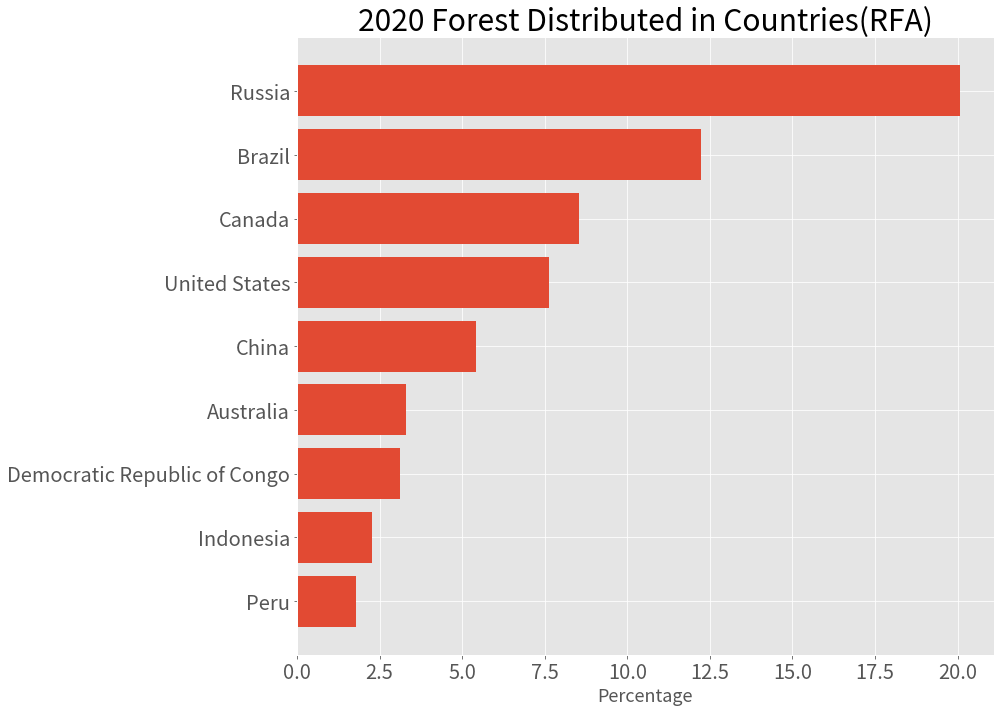

In [26]:
plt.style.use('ggplot')
plt.figure(figsize=(14,10))

countries = []
for x in ConvertedCountries2020_df.index[0:9]:
    countries.append(x)

percentage_coun = []
for x in ConvertedCountries2020_df['Share of global forest area'][0:9]:
    percentage_coun.append(x)


countries.reverse()
percentage_coun.reverse()

plt.rc('ytick', labelsize=20)
plt.rc('xtick', labelsize=20)

plt.barh(countries, percentage_coun)

plt.title('2020 Forest Distributed in Countries(RFA)', fontsize = 30)
plt.xlabel('Percentage', fontsize = 18)

plt.tight_layout()
plt.show()

In [24]:
ConvertedCountries2020_df.set_index('Entity', inplace = True)
ConvertedCountries2020_df = ConvertedCountries2020_df.drop(columns = ['Year', 'Code'])

#

#### data export

In [25]:
ConvertedContinent2020_df_1.to_excel('converted_data/ConvertedContinent2020_1_RFA.xlsx')
ConvertedContinent2020_df_2.to_excel('converted_data/ConvertedContinent2020_2_RFA.xlsx')
ConvertedCountries2020_df.to_excel('converted_data/ConvertedCountries2020_RFA.xlsx')